# Notebook for generating shutterfiles
## Setting inputs: length of flight path, t offset and repetition frequency
## Inputs for the shutter file generation: number of windows, and, for each window, tof/wavelength start-end and bin size 

In [21]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import os
import csv
import sys
#%matplotlib notebook
%matplotlib inline

In [22]:
L=56.4 #in meters
t0=0.01 #in ms
f=10 #in Hz
t2overlap=1000/f #in ms

In [23]:
# function to convert tof to lambda
def tof2l(tof):
    l=3.956*(tof-t0)/L
    return l

In [24]:
# function to convert lambda to tof
def l2tof(l):
    tof=t0+l*L/3.956
    return tof

In [25]:
# number of acquisition windows
#n_windows=input("Enter the number of acquisition window: ")
n_windows=4; # REMOVE THIS AFTER DEBUG
windows=np.zeros((n_windows,2))

In [26]:
# REMOVE THE WHOLE SECTION AFTER DEBUG
windows[0][0]=l2tof(1)
windows[0][1]=l2tof(2.45)

windows[1][0]=l2tof(2.5)
windows[1][1]=l2tof(3.3)

windows[2][0]=l2tof(3.35)
windows[2][1]=l2tof(4.6)

windows[3][0]=l2tof(4.65)
windows[3][1]=l2tof(6)

print(windows)

#windows[4][0]=22.34
#windows[4][1]=36

[[14.26682508 34.93922144]
 [35.65206269 47.05752275]
 [47.770364   65.59139535]
 [66.3042366  85.55095046]]


In [27]:
# Windows durations
delta_tof=windows[:,1]-windows[:,0]
print("delta tof:")
print(delta_tof)

delta tof:
[20.67239636 11.40546006 17.82103134 19.24671385]


In [28]:
clock_frequency=np.zeros((14))
clock_divider=np.zeros((n_windows))
clock_time=np.zeros((14))
for i in range (0,14):
    clock_frequency[i]=100/(2**i)
    clock_time[i]=0.00001*(2**i)
    #clock_divider[i]=i
range_covered=11800*clock_time
print("clock frequency:")
print(clock_frequency)
print("clock time:")
print(clock_time)
#print(clock_divider)
print("range covered:")
print(range_covered)


clock frequency:
[100.  50.  25.  12.   6.   3.   1.   0.   0.   0.   0.   0.   0.   0.]
clock time:
[1.000e-05 2.000e-05 4.000e-05 8.000e-05 1.600e-04 3.200e-04 6.400e-04
 1.280e-03 2.560e-03 5.120e-03 1.024e-02 2.048e-02 4.096e-02 8.192e-02]
range covered:
[1.18000e-01 2.36000e-01 4.72000e-01 9.44000e-01 1.88800e+00 3.77600e+00
 7.55200e+00 1.51040e+01 3.02080e+01 6.04160e+01 1.20832e+02 2.41664e+02
 4.83328e+02 9.66656e+02]


In [29]:
for i in range (0,n_windows):
    for j in range (0,14):
            if delta_tof[i]<range_covered[j]:
                clock_divider[i]=j
                break
print("clock divider:")
print(clock_divider)
    

clock divider:
[8. 7. 8. 8.]


In [30]:
clock_time[int(clock_divider[2])]

0.00256

In [31]:
# Bin width. THIS IS AN INPUT
bin_width=np.zeros((n_windows));
        
bin_width[0]=40.96
bin_width[1]=20.48
bin_width[2]=20.48
bin_width[3]=40.96
#bin_width[4]=40.96

print(bin_width)

[40.96 20.48 20.48 40.96]


In [32]:
# Shutter duration
n_shutter=n_windows-1
duration=np.zeros((n_shutter))
for i in range (0,n_shutter):
    duration[i]=windows[i+1][0]-windows[i][1]
print(duration)

[0.71284125 0.71284125 0.71284125]


In [33]:
# Resolution calculation
min_res=bin_width*0.001/windows[:,0]
max_res=bin_width*0.001/windows[:,1]
print(min_res*100)
print(max_res*100)

[0.28709962 0.05744408 0.04287177 0.06177584]
[0.11723215 0.0435212  0.03122361 0.0478779 ]


In [34]:
# calculation of the number of file and space needed
no_file=np.ceil(delta_tof*1000/bin_width);
tot_file=np.sum(no_file)
print("Number of file produced: ")
print(tot_file)
print("Number of fiels")
print(no_file)

Number of file produced: 
2403.0
Number of fiels
[505. 557. 871. 470.]


In [35]:
#base_path = "/path/to/directory/holding/file/"
filename = "alpha.txt"
filename2= "lambda.txt"
#path_to_file = os.path.join(base_path, filename)
#fd = open(path_to_file , 'r')
fp = open(filename , 'r')
fp2 = open(filename2, 'r')
#spectrum=csv.reader(fp, delimiter="\t")

In [36]:
#data = np.genfromtxt(filename, delimiter = '\t', skip_header=1)
data = np.genfromtxt(filename)
l = np.genfromtxt(filename2)

In [37]:
#type(data)
y=data.T
x =l.T

#x_axis=x(0)
#y_axis=y(0)
#np.delete(x,0)
#np.delete(y,0)

Text(0.5,1,u'Theoretical Iron spectrum with overimposed windows')

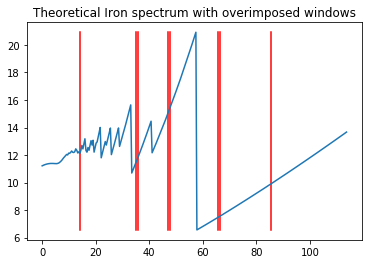

In [47]:

for i in range (0,n_windows):
    win_plot_x_1=(windows[i][0],windows[i][0])
    win_plot_y_1=(min(y),max(y))
    plt.plot(win_plot_x_1,win_plot_y_1,'r-')
    win_plot_x_2=(windows[i][1],windows[i][1])
    win_plot_y_2=(min(y),max(y))
    plt.plot(win_plot_x_2,win_plot_y_2,'r-')
plt.plot(l2tof(x),y)
plt.title("Theoretical Iron spectrum with overimposed windows")
   


In [41]:
#write a txt file for the shutter
filename_out = 'FileShutter.txt'

with open(filename_out, 'w') as f:
    for i in range(0,n_windows):
            f.write(str(windows[i][0]))
            f.write("\t")
            f.write(str(windows[i][1]))
            f.write("\t")
            f.write(str(clock_divider[i]))
            f.write("\t")
            f.write(str(bin_width[i]))
            f.write("\n")
